<a href="https://colab.research.google.com/github/leaf7823/hosripo/blob/master/%E7%AC%AC8%E5%9B%9E%E3%80%90%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%80%91%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB%E3%83%9E%E3%82%B7%E3%83%B3%EF%BC%88%E5%BE%8C%E7%B7%A8%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mglearn 

     |████████████████████████████████| 542kB 5.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582706 sha256=85bfd48240c20211bf7e0ee2e388cd7b91f88b5ed741e519d1bfe7d6947040b9
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn .datasets import make_moons

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
moons = make_moons(n_samples=200,noise=0.1,random_state=0)
moons

(array([[ 7.92357355e-01,  5.02648573e-01],
        [ 1.63158315e+00, -4.63896705e-01],
        [-6.71092674e-02,  2.67767057e-01],
        [-1.04412427e+00, -1.82607610e-01],
        [ 1.76704822e+00, -1.98609868e-01],
        [ 1.90607398e+00, -7.10915927e-02],
        [ 9.62192129e-01,  2.61986075e-01],
        [ 8.86813848e-01, -4.84896235e-01],
        [ 8.68935196e-01,  3.61092776e-01],
        [ 1.15352953e+00, -5.72352929e-01],
        [-3.70714493e-01,  7.21655833e-01],
        [ 1.95523229e-01, -2.64439358e-01],
        [ 1.80949658e+00, -1.94707885e-01],
        [ 1.29046617e+00, -3.23893778e-01],
        [-8.23662620e-01,  7.17643700e-01],
        [ 9.85881879e-01,  1.96706218e-01],
        [ 5.81943503e-01,  9.06311048e-01],
        [ 2.76118902e-01, -2.87451069e-01],
        [ 3.17284813e-01,  8.54200996e-01],
        [-8.52697952e-01,  9.32383274e-01],
        [ 1.97796688e+00,  1.04796611e-02],
        [ 8.64249290e-01, -4.63242870e-01],
        [ 2.57499053e-01,  1.003

In [0]:
X=moons[0]
y=moons[1]

<function matplotlib.pyplot.plot>

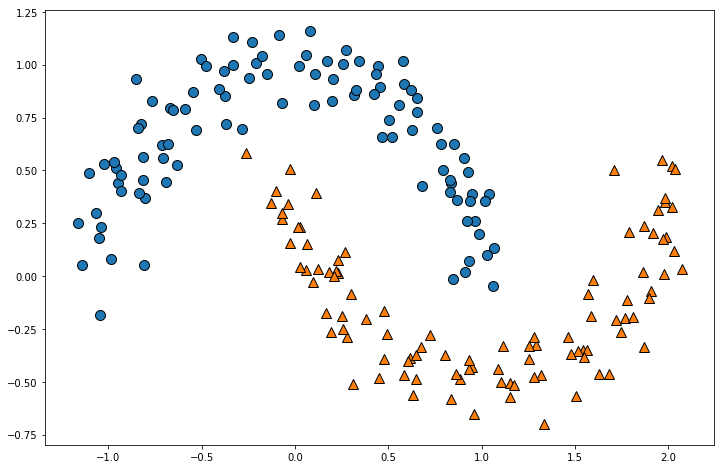

In [0]:
plt.figure(figsize=(12,8))
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
plt.plot

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [0]:
#ds分割
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y,random_state=0)

#スケーリング
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

In [0]:
lin_svm = LinearSVC().fit(X_train_Scaled,y_train)


Text(0, 0.5, '$X_1$')

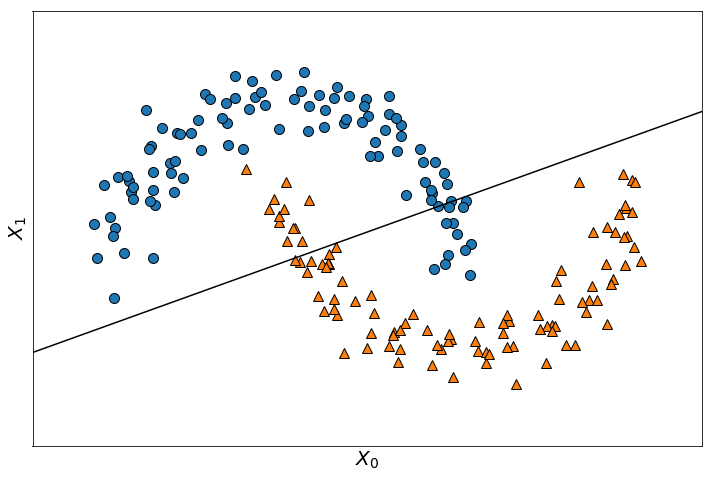

In [0]:
# どのような分離直線を得たか確認のため図示する
plt.figure(figsize=(12, 8))
mglearn.plots.plot_2d_separator(lin_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("$X_0$",fontsize=20)
plt.ylabel("$X_1$",fontsize=20)

In [0]:
#高次元特徴区間へ写像、より高次元が入力データを考える

from sklearn.preprocessing import PolynomialFeatures

In [0]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

print(X_train_poly.shape)
print(X_train_poly)

(150, 10)
[[ 1.00000000e+00  8.86813848e-01 -4.84896235e-01 ... -3.81341214e-01
   2.08511538e-01 -1.14010917e-01]
 [ 1.00000000e+00  9.24799914e-01  4.94247065e-01 ...  4.22707215e-01
   2.25910272e-01  1.20734753e-01]
 [ 1.00000000e+00 -7.63797985e-01  8.26528213e-01 ...  4.82186114e-01
  -5.21787743e-01  5.64641828e-01]
 ...
 [ 1.00000000e+00 -9.68196502e-01  5.38851311e-01 ...  5.05121626e-01
  -2.81126249e-01  1.56461263e-01]
 [ 1.00000000e+00 -6.70964946e-01  7.93803059e-01 ...  3.57365342e-01
  -4.22790644e-01  5.00193800e-01]
 [ 1.00000000e+00 -2.68526403e-02  5.04722011e-01 ...  3.63937020e-04
  -6.84055729e-03  1.28575060e-01]]


In [0]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

In [0]:
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.fit_transform(X_test_poly)

lin_svm = LinearSVC().fit(X_train_poly_scaled,y_train)
lin_svm.predict(X_test_poly_scaled)  == y_test

# 全データtrueで3次元までの写像を加えた新たなデータが正しく作成された
#　問題PolynomialFeaturesで計算した場合、今回よりデータが大量になると計算Costが高くなる、カーネル法を使う

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [0]:
# 上記の処理が複数になるためPipelineで簡潔にする

from sklearn.pipeline import Pipeline

poly_svm = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('SVM', LinearSVC())
])

poly_svm.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [0]:
def plot_decision_function(model):
    _x0 = np.linspace(-1.5, 2.5, 100)
    _x1 = np.linspace(-1.0, 1.5, 100)
    x0, x1 = np.meshgrid(_x0, _x1)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X).reshape(x0.shape)
    y_decision = model.decision_function(X),reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0 ,x1, y_decision,levels=[y_decision.min(), 0, y_decision.max()], alpha=0.3)

def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo",  ms=15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^",  ms=15)
    plt.xlabel("$x_1$", fontsize=20)
    plt.ylabel("$x_2$", fontsize=20, rotation=0)  
plt.figure(figsize=(12, 8))
plot_decision_function(poly_svm)
plot_dataset(X, y)
plt.show()


ValueError: ignored

<Figure size 864x576 with 0 Axes>

In [0]:
from sklearn.svm import SVC

In [0]:
kernel.svm = Pipeline([
    ('Scaler',StandardScaler()),
    ('svm', SVC(kernel='poly',degree=3,coef0=1))
])
    
kernel_svm.fit(X, y)
plt.figure(figsize=(12,8))
plot.decision_function(kernel_svm)
plot_dataset(X, y)
plt,show()

NameError: ignored